In [61]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [62]:
df_train = pd.read_csv("~/Desktop/w207re-final-proj/data/kaggle/train.csv")
print(df_train.head())
print(df_train.columns)
print(df_train['Category'].describe())
df_train['Category'].unique()

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

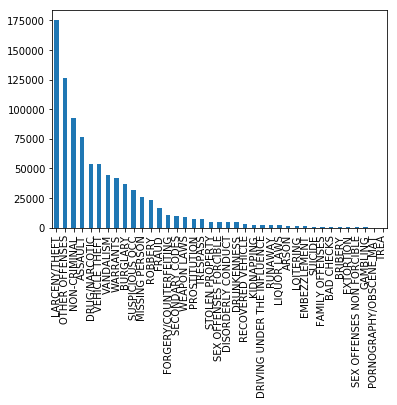

In [63]:
df_train['Category'].value_counts().plot(kind='bar')

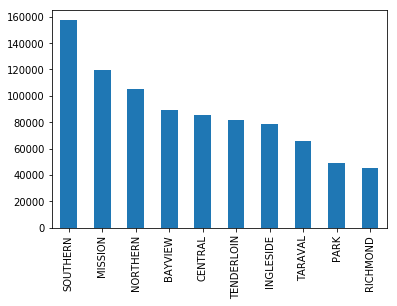

In [64]:
df_train['PdDistrict'].value_counts().plot(kind='bar')

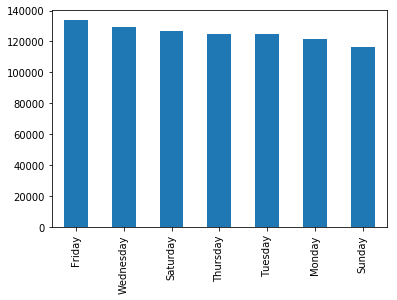

In [65]:
df_train['DayOfWeek'].value_counts().plot(kind='bar')

In [66]:
df_train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [67]:
df_train[df_train['Address'].str.contains('OAK')]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
311,2015-05-13 06:15:00,WARRANTS,WARRANT ARREST,Wednesday,PARK,"ARREST, BOOKED",1700 Block of OAK ST,-122.448162,37.771825
313,2015-05-13 06:15:00,OTHER OFFENSES,VIOLATION OF PARK CODE,Wednesday,PARK,"ARREST, BOOKED",1700 Block of OAK ST,-122.448162,37.771825
866,2015-05-11 17:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Monday,NORTHERN,NONE,BUCHANAN ST / OAK ST,-122.427547,37.774387
1019,2015-05-11 10:00:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,PARK,NONE,OAK ST / ASHBURY ST,-122.447315,37.771876
1023,2015-05-11 09:42:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Monday,NORTHERN,NONE,100 Block of OAK ST,-122.421806,37.775181
1024,2015-05-11 09:42:00,TRESPASS,TRESPASSING,Monday,NORTHERN,NONE,100 Block of OAK ST,-122.421806,37.775181
1089,2015-05-11 02:10:00,OTHER OFFENSES,TRAFFIC VIOLATION,Monday,BAYVIEW,"ARREST, BOOKED",OAKDALE AV / LOOMIS ST,-122.404309,37.742522
1108,2015-05-11 00:15:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",NEWHALL ST / OAKDALE AV,-122.392217,37.735663


In [68]:
df_train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [69]:
le = LabelEncoder()
train_data = copy.deepcopy(df_train)
cat_col = ['Category', 'DayOfWeek', 'PdDistrict', 'Address']
train_data[cat_col] = train_data[cat_col].apply(lambda col: le.fit_transform(col))
train_labels = copy.deepcopy(train_data['Category'])
train_data.drop('Descript', axis=1, inplace=True)
train_data.drop('Resolution', axis=1, inplace=True)
train_data.drop('Category', axis=1, inplace=True)

In [70]:
test_data = pd.read_csv("~/Desktop/w207re-final-proj/data/kaggle/test.csv")
cat_col = ['DayOfWeek', 'PdDistrict', 'Address']
test_data[cat_col] = test_data[cat_col].apply(lambda col: le.fit_transform(col))

In [71]:
# convert the dates or timestamps to an integer number of days since the start of the data
dtt = pd.to_datetime(train_data['Dates'])
dtt = (dtt - dtt.min()) / np.timedelta64(1,'D')
train_data['Dates'] = dtt

dtt = pd.to_datetime(test_data['Dates'])
dtt = (dtt - dtt.min()) / np.timedelta64(1,'D')
test_data['Dates'] = dtt

In [72]:
all_data = copy.deepcopy(train_data)
all_labels = copy.deepcopy(train_labels)
train_fraction = 0.9

train_idx = np.random.rand(len(train_data)) < train_fraction

train_data = all_data[train_idx]
train_labels = all_labels[train_idx]

dev_data = all_data[~train_idx]
dev_labels = all_labels[~train_idx]

print("num train data", len(train_data))
print("num train labels", len(train_labels))
print("num dev data", len(dev_data))
print("num dev labels", len(dev_labels))

num train data 790057
num train labels 790057
num dev data 87992
num dev labels 87992


In [ ]:
lr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
lr.fit(train_data, train_labels)

In [56]:
preds = lr.predict(dev_data)
accuracy = np.mean(preds == dev_labels)
print(accuracy)

0.20283993549037396
